In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving anime.csv to anime.csv


### **Loading The Data set**

In [3]:
df = pd.read_csv("anime.csv") #Loading the data set in a python env

In [4]:
df.head() #Review the data set before exploratory data analysis

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## **Exploratory Data Analysis**

In [5]:
#General information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


### **General Observations**

- There are almost 12.3K entries ranging from 0-12293 and there's another unique identifier of each rows means about each anime is identified with unique number.

- The data set has 7 different columns two of them are unique identifiers but they are completely different one is unique idenfication number and another is the name/title of the anime.

- Column genre decides what kind of anime it is whether it is an action genre or advature etc.

- While type column represents what type of anime it is.For example if anime is movie  that means anime is releade theatrically or in any streaming services like wise.

  - TV - a series of episodes televised in a period of time.
  - OVA or OAV - Original video animation a kind special episodes to promot the series or movies.
  - ONA - Original net animations are released directly on the internet
  - Music - it kind of a music video which is animated.
  - Special - a special episode which is typically non canon episode broadcasted on television.

- The episodes columns refers to how many no.of episode an anime has.and it seems there are missing values which are labelled as unknown which suggest some those are currently running that explains why the data type of the column in object.

- Rating column represents how much it rated as and members column refering that how many of them are watched and rated the anime.

In [6]:
#The column episode data type should be integer so let's change it.
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce') #Changing unique values along with dtype
df['episodes'] = df['episodes'].astype(np.float64)

### **Descriptive Statistics**

In [7]:
df.describe(include=['int64','float64','object']) #Including object dtype to see unique and top values of each column

,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,11954.000000,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,NaN,NaN,NaN
top,NaN,Shi Wan Ge Leng Xiaohua,Hentai,TV,NaN,NaN,NaN
freq,NaN,2,823,3787,NaN,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,12.382550,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,46.865352,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,1.000000,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,1.000000,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,2.000000,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,12.000000,7.180000,9.437000e+03


In [8]:
#skewness and Kurtosis of numerical columns
Skewness = df.skew(numeric_only=True)
Kurtosis = df.kurtosis(numeric_only=True)
stats_table = pd.DataFrame({'Skewness': Skewness, 'Kurtosis': Kurtosis})
stats_table

,Skewness,Kurtosis
anime_id,0.441550,-1.312915
episodes,23.385641,733.276525
rating,-0.543570,0.507530
members,6.682934,62.856097


### **Data Visualization**

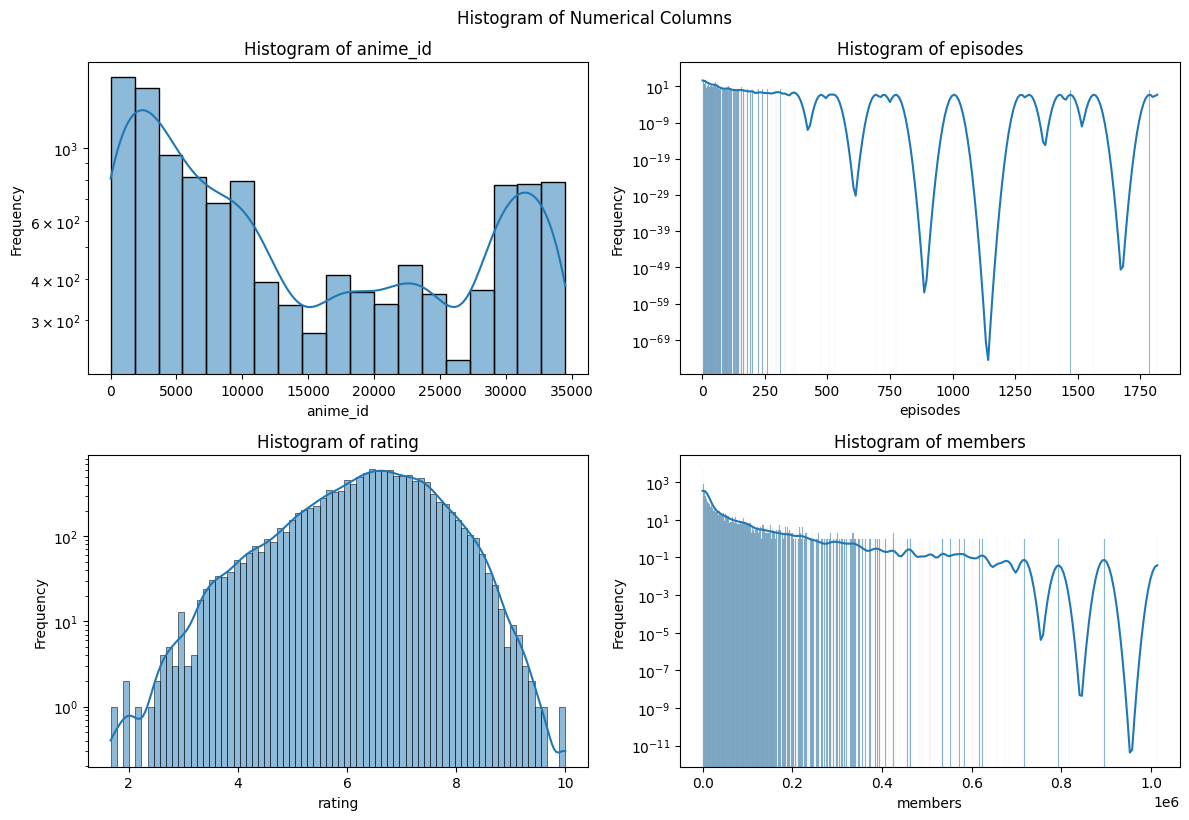

In [9]:
#Histogram of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(2,2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, bins ='auto',ax=axes[i],log =True)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Histogram of Numerical Columns', y=1.02)
plt.show()

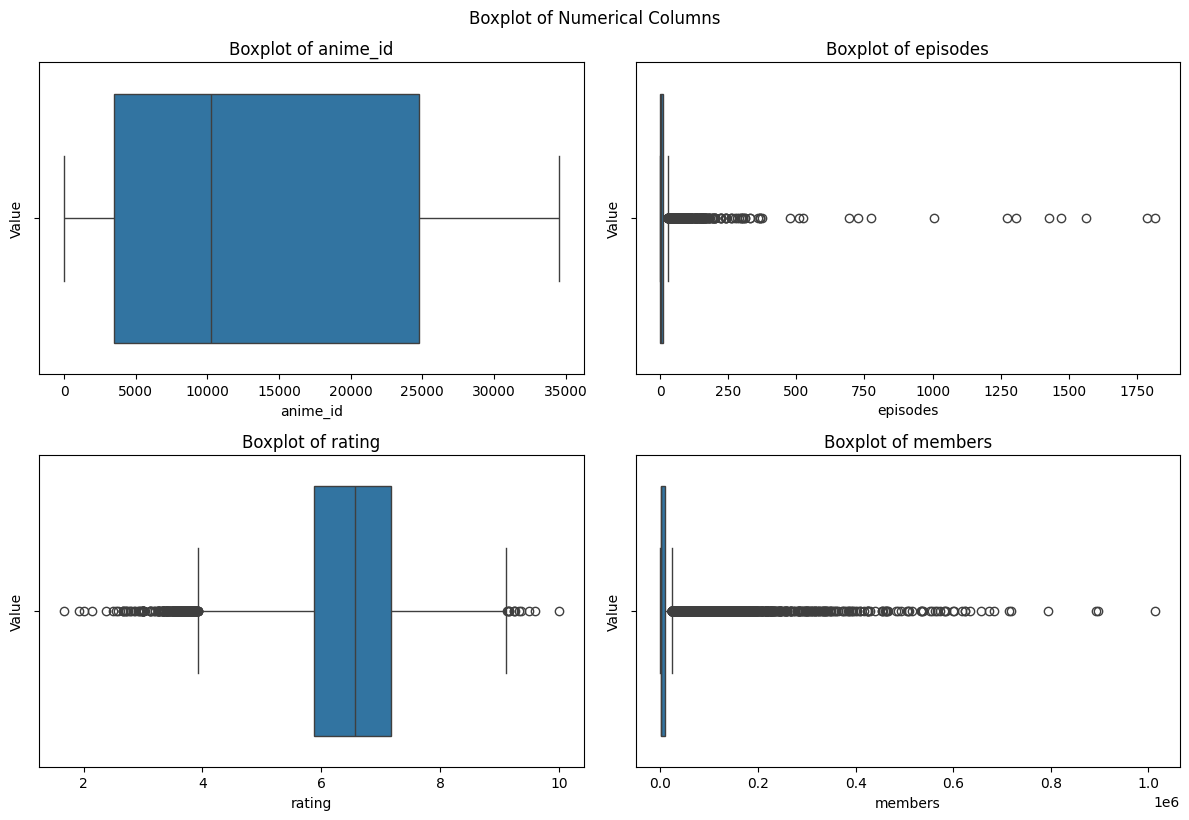

In [10]:
#Boxplotting all numerical columns
fig, axes = plt.subplots(2,2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Value')

plt.tight_layout()
plt.suptitle('Boxplot of Numerical Columns', y=1.02)
plt.show()


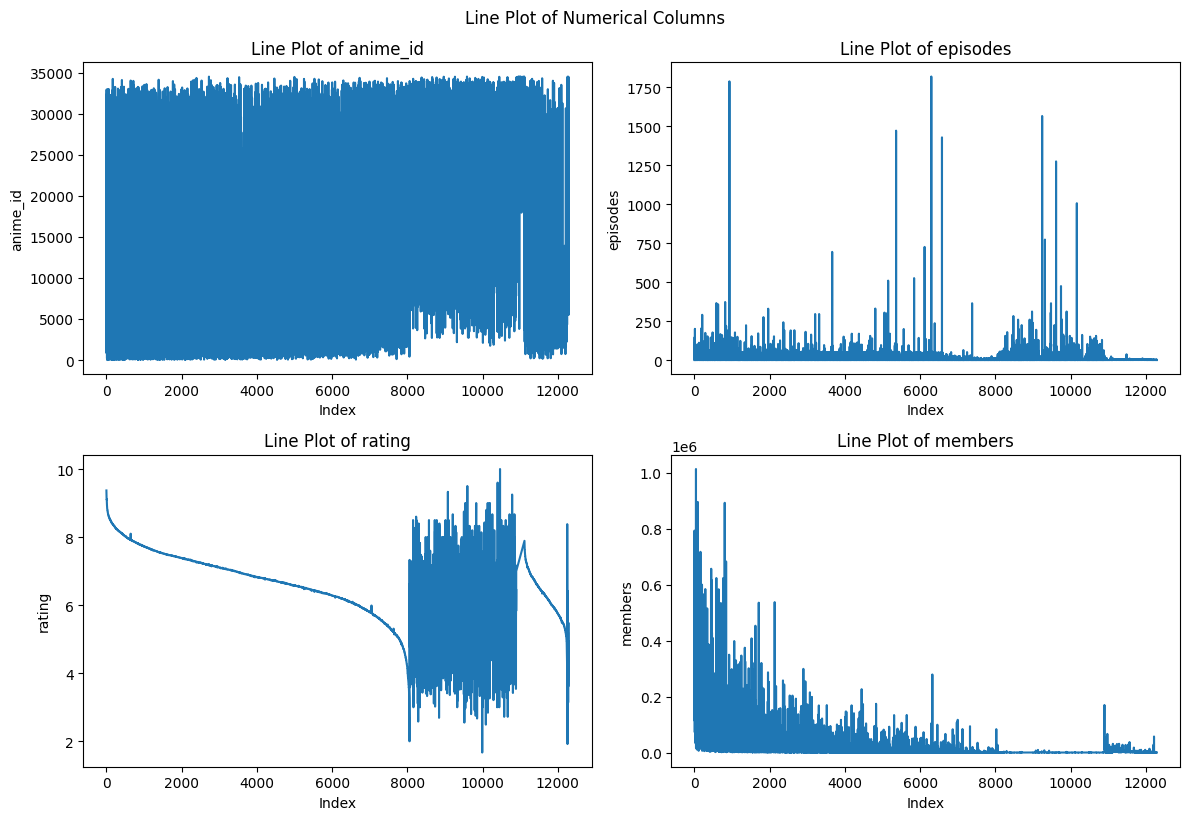

In [11]:
#creating line plot for numeric columns
fig, axes = plt.subplots(2,2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.lineplot(data=df, x=df.index, y=col, ax=axes[i])
    axes[i].set_title(f'Line Plot of {col}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.suptitle('Line Plot of Numerical Columns', y=1.02)
plt.show()

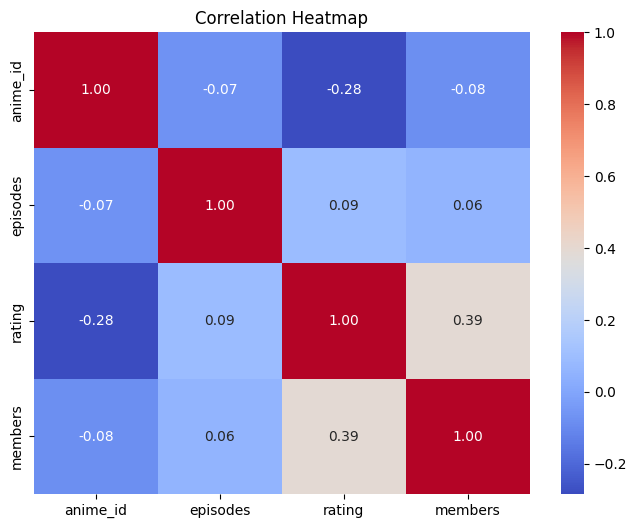

In [12]:
#Correlation heatmap of the numerical columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **Insights And Patterns**

#### **From Descriptive Statistics**

- The anime_id column is just an identifier, not useful for any analysis.the values range from 1 to 34,527, with a mean of 14,058 - suggesting different dates of adding to the list have different range of unique IDs.
- There are 12,292 unique anime names, but two of them have the same name ("Shi Wan Ge Leng Xiaohua"), which might indicate duplicates or remake versions .
- 3,264 unique genres (most likely a combination of multiple genres)."Hentai" appears 823 times, making it the most frequent genre.
- Type (TV, Movie, OVA, specials,etc.) column has six unique values, with "TV" being the most common (appearing 3,787 times).
- Episodes is highly skewed distribution with Median=2 episodes,but mean=12.38 episodes.Maximum = 1,818 episodes (very likely to be long-running anime/cartoon like doremon.).
75% of anime have ≤ 12 episodes, suggesting most are seasonal
- Rating column is normally distributed ranges from 1.67 to 10.Mean = 6.47, Median = 6.5(slightly left-skewed).
Most anime have ratings between 5.88 and 7.18 (IQR range).
- Members (Popularity)there's a huge variation in the distribution with Median = 1,550 members, but the mean is 18,071, meaning a few highly popular anime skew the distribution with high ratings.Maximum = 1,013,917 members (probably a very famous anime like NAruto,one piece, dragon balls,bleach etc).

### **From visualization**

**=> Histogram Analysis**

-The distribution of anime_id is right-skewed, with more anime having lower IDs  than newer ones. This suggests that most anime_id in the dataset belong to different ranges and also are old records, while newer ones are fewer.
- Episodes column is highly skewed distributed, with most anime having very few episodes (between 1 and 12) because of being seasonal. A few outliers have an extremely high number of episodes, such as long-running series (Doremon,One Piece, Detective Conan).
- The histogram of ratings column shows a near-normal distribution, peaking around 6.5-7.0. A few anime have very low or very high ratings, but most are clustered in the mid-range(makes it slightly left skewed).
- The members columns extremely right-skewed indicating that a small number of anime have massive popularity, while the majority have low member counts shows the impact of rating column.

**=> Boxplot Analysis**

- Anime ID - No significant outliers, showing a steady distribution.
- Episodes - Extreme outliers exist, confirming that most anime have fewer episodes, but a few (Doremon, One Piece) have a massive episode count.
- Ratings - Slight skewness, with some low-rating outliers (probably unpopular anime). The majority fall between 5.5 - 8.0.
- Members - Highly skewed with multiple outliers, indicating that a small number of anime dominate in terms of popularity.

**=> Correlation Heatmap Insights**

- Rating & Members (0.39 correlation) - Shows a moderate positive correlation. means higher-rated anime tend to have more members, but not always (some highly rated anime may be niche).
- Episodes & Members (0.06 correlation) - Almost no correlation. Long-running anime do not necessarily have more fans.
- Rating & Episodes (0.09 correlation) - Minimal correlation, meaning that having more episodes does not directly affect ratings.
---

## **Data Preprocessing**

#### **Handling Missing Values**

In [13]:
#Let's see if there are any missing values
df.isnull().sum()


,0
anime_id,0
name,0
genre,62
type,25
episodes,340
rating,230
members,0


   * There are few missing values in genre,type,episodes and ratings and thier
   data types are object,object,float and float respectively.
   
   * In the genre column we can try fill them with mode but it rise complications in recommendations.so we gonna just replace with unknown value
   
   * But we can fill "type"column with certain modes of the columns like if there are 1 it'll be replaced as a movie or else it TV.

   * finally filling ratings column with mean value.


In [14]:
#Lets fill episode column before genre,type and ratings
df.fillna({"episodes":df['episodes'].mean()}, inplace=True)
df['episodes'] = df['episodes'].astype(np.float64)

In [15]:
#Defining a function to assign type based on the number of episodes
def fill_type(row):
    if pd.isnull(row['type']):  #Checking if 'type' is missing
        if row['episodes'] == 1:
            return 'Movie'    #assigns movie as value if episode of the anime is 1 episode
        else :row['episodes'] > 1
        return 'TV'
    return row['type']  # Keep existing values

# Apply the function to fill missing values
df['type'] = df.apply(fill_type, axis=1)
df.fillna({"genre":"Unknown"}, inplace=True)
df.fillna({"rating":df['rating'].mean()}, inplace=True)
df['rating'] = df['rating'].astype(np.float64)

In [16]:
#Let's see popular anime by rating
df[['name','rating']].sort_values(by='rating',ascending=False).head(10)

,name,rating
10464,Taka no Tsume 8: Yoshida-kun no X-Files,10.00
10400,Spoon-hime no Swing Kitchen,9.60
9595,Mogura no Motoro,9.50
0,Kimi no Na wa.,9.37
9078,Kahei no Umi,9.33
1,Fullmetal Alchemist: Brotherhood,9.26
10786,Yakusoku: Africa Mizu to Midori,9.25
2,Gintama°,9.25
3,Steins;Gate,9.17
4,Gintama&#039;,9.16


### **Feature Extraction**

> There are three columns that needs to be
     calculated for cosine similarity
   
   - The genre &type columns are categorical columns so they needs to be encoded.

   -  while rating column is a numerical column it needs to be normalize along with encoded columns

In [17]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


#### **Encoding**

In [18]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#Implementing TF-IDF Vectorization for genres
tfidf = TfidfVectorizer(stop_words='english')
genre_matrix = tfidf.fit_transform(df['genre'].fillna(''))  # Handle missing values

#Label encoding for Type column
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

pd.set_option('display.max_columns',None)

In [19]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",0,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",5,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",5,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",5,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",5,51.0,9.16,151266


In [20]:
#dropping unnecessary columns
df.drop(columns=['anime_id','genre'], axis=1, inplace=True)

#### **Scaling**

In [21]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer

mms = MinMaxScaler()
power = PowerTransformer() #to reduce the impact of outliers

df['rating'] = mms.fit_transform(df[['rating']])
df[['type','episodes','members']] = power.fit_transform(df[['type','episodes','members']])

#Again minmaxscaling episodes and member columns to bring them to standard range
df[['type','episodes','members']] = mms.fit_transform(df[['type','episodes','members']])

In [22]:
df.head()

,name,type,episodes,rating,members
0,Kimi no Na wa.,0.0,0.000000,0.924370,0.903471
1,Fullmetal Alchemist: Brotherhood,1.0,0.881237,0.911164,0.986000
2,Gintama°,1.0,0.862253,0.909964,0.867680
3,Steins;Gate,1.0,0.779836,0.900360,0.976507
4,Gintama&#039;,1.0,0.862253,0.899160,0.885666


## **Recommendation System**

In [23]:
import numpy as np
from scipy.sparse import hstack  #Using for combining sparse & dense matrices

#Selecting numerical features
num_features = df[['rating', 'episodes', 'members', 'type']].values

#Combining numerical features with genre TF-IDF matrix
feature_matrix = hstack([genre_matrix, num_features])

#Converting to dense array if needed
feature_matrix = feature_matrix.toarray()

In [24]:
#Implimenting collaborative filtering
from sklearn.metrics.pairwise import cosine_similarity

#Computing the cosine similarity matrix
cos_sim = cosine_similarity(feature_matrix)

In [25]:
#Defining recommending anime function
def recommend_anime(name, df, cos_sim, top_n=10):

    if name not in df['name'].values: #Getting index of the given anime
        return "Anime not found in the dataset."

    idx = df[df['name'] == name].index[0]

    sim_scores = list(enumerate(cos_sim[idx])) #Let's get the similarity scores for all anime

    #Sorting anime by similarity score(while excluding itself)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    anime_indices = [i[0] for i in sim_scores] #Getting the right anime indices

    #Returning top recommended animes based on rating
    return df.iloc[anime_indices][['name', 'rating']]


In [26]:
#Testing the recommendation system
recommend_anime("One Piece", df, cos_sim, top_n=10)

,name,rating
86,Shingeki no Kyojin,0.824730
10899,Shingeki no Kyojin Season 2,0.576699
6,Hunter x Hunter (2011),0.895558
112,Hunter x Hunter,0.817527
175,Katekyo Hitman Reborn!,0.804322
2119,One Piece: Glorious Island,0.681873
717,Shingeki no Kyojin OVA,0.745498
178,Boku no Hero Academia,0.803121
1192,R.O.D the TV,0.716687
2167,Tactics,0.680672


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendations(df, cos_sim, k=6):
    y_true = []  #Actual relevant anime (1 for relevant, 0 for not relevant)
    y_pred = []  #Predicted recommendations

    #Defining relevant anime especialy those with high ratings
    relevant_anime = df[df["rating"] > 0.5].index  #Adjust threshold of ratings if needed
    print(f"Number of relevant anime: {len(relevant_anime)}")  #Debugging

    for idx in range(len(df)):
        sim_scores = list(enumerate(cos_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        top_k_indices = [i[0] for i in sim_scores[1:k+1]]

        #Storing true values as 1 if relevant otherwise 0
        y_true.extend([1 if i in relevant_anime else 0 for i in top_k_indices])
        y_pred.extend([1] * len(top_k_indices))  #All recommendations are "positive"

    #Debugging to Check if y_true has any 1s
    print("First 20 y_true:", y_true[:20])

    #Computing precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)

    return {"Precision": precision, "Recall": recall, "F1-score": f1}

#Runing evaluation
evaluate_recommendations(df, cos_sim)


Number of relevant anime: 9407
First 20 y_true: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


{'Precision': 0.7940594327856407,
 'Recall': 1.0,
 'F1-score': 0.8852097297052223}

### **Analysis Of Recommendation System Performance**
- **Precision**: Measures the proportion of recommended anime that are relevant to the user prefernced anime.
- **Recall**: Measures how many relevant anime were successfully recommended.
- **F1-score**:The Balanced mean of precision and recall.

**Final Results:**
- **Precision:** 79.4%
- **Recall:** 100%
- **F1-score:** 88.5%

By lowering the relevance threshold, precision improved significantly and so does the F1-score, while recall remained perfect, ensuring a balanced recommendation system.

### **Conclusion & Future Improvements**
This anime recommendation system provides **"highly relevant recommendations"** with an excellent balance between precision and recall. Future improvements could include:
- **More features**: Like film certifications or movie/ rating which gives  more context to filter the recommendations which are appropriate for certain ages,
- **Hybrid filtering**: Combining content-based and collaborative filtering.
- **Incorporating user preferences**: Allowing for personalized recommendations.
 like sorting methods for genre or type preference which can makes user try different anime if the current one makes them bored.
- **Enhancing feature selection**: Using deep learning for embedding-based similarity.

This system effectively suggests anime based on user interests and can be further refined for real-world deployment.



### **Interview Questions**

**=> Difference Between User-Based and Item-Based Collaborative Filtering**

**Collaborative filtering**

 This is a technique commonly used in recommendation system to predict user interests and preferences by collecting and analyzing the data from many users it relies more on ideas that users share normally in daily life but more robotically in decision making nature for instance a user liked certain movie and he more likely like this kind of movie based on his or who also liked the same movie like the user.

Collaborative filtering is mainly two types they are

- **User-Based Collaborative Filtering**
- **Item-Based Collaborative Filtering**


 > User-Based Collaborative Filtering (UBCF)

- Focuses on similar users to make recommendations.
- If User A likes similar anime as User B, then anime liked by User B (which is not yet seen by User A) will be recommended to User A.

 "Example":- If two users watch and rate the same anime highly, their preferences are similar. So, recommendations are made based on what one user has watched but the other hasn’t.

 "Downside":- Can be ineffective if users have sparse rating data (not many shared preferencesor age).

> Item-Based Collaborative Filtering (IBCF)

- Focuses on similar items rather than users.
- If anime X and anime Y are rated similarly by many users, they are considered similar. If a user watches anime X but haven't watched anime Y yet it recommends Anime Y.

"Example":- If people who watched 'Naruto'n also watched Bleach rated similarly, the system will recommend Bleach to new Naruto viewers.

"Downside":- Different people have different perspectives so not all recommendations will be worth in others prespective.

"Advantage":-Almost works well even with fewer user interactions since item similarities don’t change frequently.

__Key Differences__:

- User-Based CF: Finds similar users and recommends what they liked.
- Item-Based CF: Finds similar items and recommends based on past interactions of users.

__=>Collaborative Filtering & How It Works__

 **Definition**:-

This is a technique commonly used in recommendation system to predict user interests and preferences by collecting and analyzing the data from many users it relies more on ideas that users share normally in daily life but more robotically in decision making nature for instance a user liked certain movie and he more likely like this kind of movie based on his or who also liked the same movie like the user.

 __How It Actually Works__

1. Data Collection - CF gathers user-item interaction data (e.g., ratings, views, clicks).

2. Similarity Calculation - Measures similarity between users (User-Based CF) or items (Item-Based CF) using methods like cosine similarity, Pearson correlation, or Jaccard similarity.

3. Recommendation Generation - Based on similarity, CF suggests items a user hasn’t seen but similar users/items have rated highly.

4. Prediction & Ranking - The system ranks recommendations and presents them to the user.

 >__=>Types of Collaborative Filtering__

  - Memory-Based CF: Uses similarity scores directly from past interactions (like User-User or Item-Item similarity).
  - Model-Based CF: Uses machine learning (e.g., matrix factorization, neural networks) to predict ratings more effectively.

    __Example__:

      If User A likes Naruto and One Piece, and User B likes Naruto and Bleach, then CF might recommend Bleach to User A & recommends One piece to user B  since User B has a similar taste to user a like wise user B also have user A's .